In [1]:
import numpy as np
from skimage import io
import sys, os
import matplotlib.pyplot as plt

In [2]:
IMG_PATH = "../TaskA(report)/Aberdeen"
NUM_IMG = 415

In [3]:
imgs = []
for i in range(NUM_IMG):
    img_path = os.path.join(IMG_PATH, str(i)+'.jpg')
    img = io.imread(img_path)
    imgs.append(img.flatten())

In [4]:
imgs_arr = np.array(imgs).astype(np.float64)
mu = np.mean(imgs_arr, axis = 0).astype(np.float64)
del imgs

# 1(a)

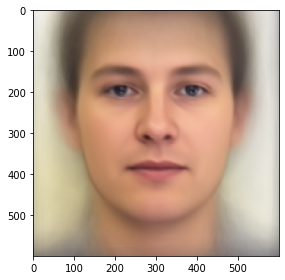

In [5]:
io.imshow((mu/255).reshape(600,600,3))
io.show()

# 1(b)

In [6]:
def post_process(M):
    M -= np.min(M)
    M /= np.max(M)
    M = (M * 255).astype(np.uint8)
    return M

In [7]:
imgs_norm = imgs_arr - mu
#imgs_norm = imgs_norm.reshape(NUM_IMG, -1)
del imgs_arr

In [8]:
#eigen: eigenspace of X's cov., shape = (M, K)
#S: eigenvalue at each diag, shape = (K, K)
#V: shape = (K, N)
eigen, S, V = np.linalg.svd(imgs_norm.T, full_matrices=False)

In [9]:
N = 5
top_5_eface = eigen[:, :N].astype(np.float64)

In [10]:
top_5_eface_post_processed = np.apply_along_axis(
    post_process, axis = 0, 
    arr = -top_5_eface)

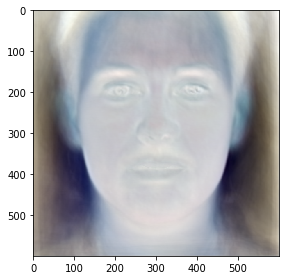

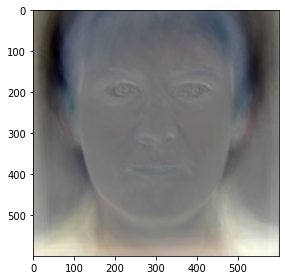

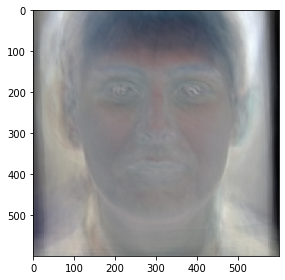

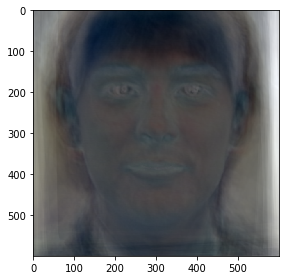

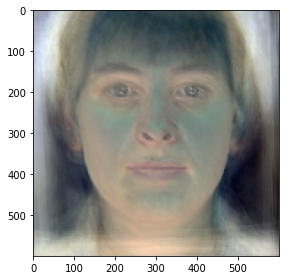

In [11]:
for i in range(N):
  io.imshow(top_5_eface_post_processed[:, i].reshape(600, 600, 3))
  io.show()

## Problem2 (Reconstruction)

In [12]:
rand_img_idx = np.random.randint(0, NUM_IMG, 5)

In [13]:
k = 5
weights = np.dot(imgs_norm, eigen) #(N, M) * (M, K)
recon = mu + np.dot(
    weights[rand_img_idx, :k], 
    eigen[:, :k].T
    )

In [14]:
recon_img_preprocessed = np.apply_along_axis(
    post_process, axis = 1, 
    arr = recon)

Picture number 182


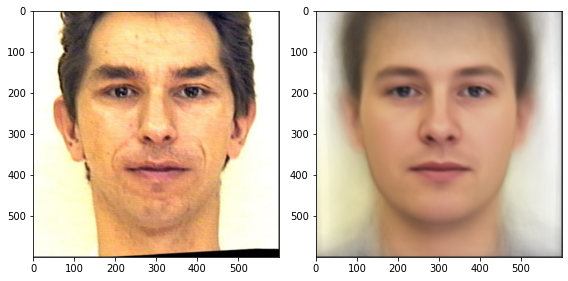

Picture number 288


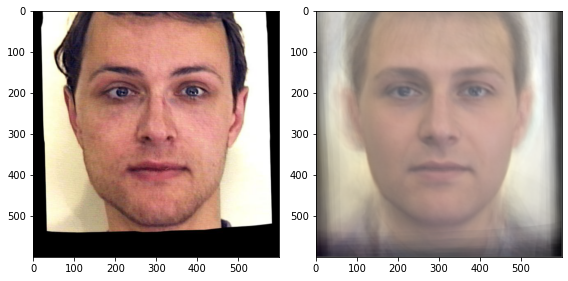

Picture number 140


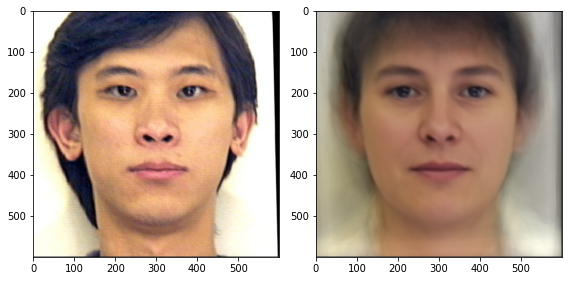

Picture number 282


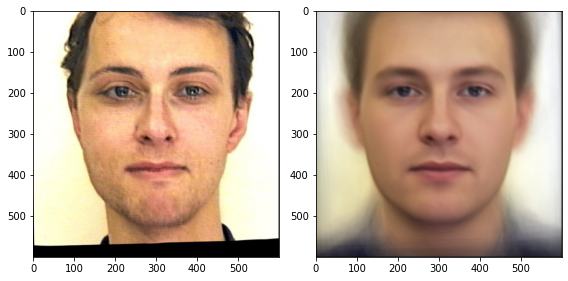

Picture number 398


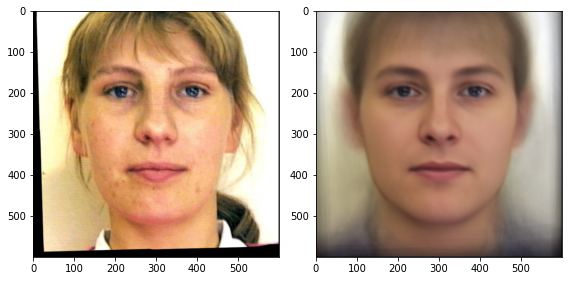

In [15]:
for i, img_idx in enumerate(rand_img_idx):
  fig, axes = plt.subplots(1, 2, figsize=(8, 4))
  ax = axes.ravel()
  print(f"Picture number {img_idx}")
  img_path = os.path.join(IMG_PATH, str(img_idx)+'.jpg')
  orgin_img = io.imread(img_path)
  ax[0].imshow(orgin_img)
  ax[1].imshow(recon_img_preprocessed[i, :].reshape(600, 600, 3))
  fig.tight_layout()
  plt.show()